# Trabalho Final - Modelos de IA e Machine Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

# Exercício 1.1

Utilizando o arquivo **1.1_papafrescasimnao.csv** que é um recorte de teste deste projeto, descubra algumas regras de associação relacionadas ao consumo de batata, procure a relação de regras relacionadas ao questionamento da batata engordar ou não.

Dica: Procure utilizar uma confiança acima de 50% e verifique a quantidade de regras geradas antes de inspeciona-las.

In [2]:
#Importando as bibliotecas. Se houver algum erro, use "pip install Libname"
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [9]:
#Leitura do dataset .csv

#Lembrar que a origem da dataset é uma variável.
#Neste caso é proveniente da pasta de datasets do Github: https://github.com/fiapIA/modelos_de_ia_e_ml/data


dataset = pd.read_csv('data/1.1_papafrescasimnao.csv', sep=';', engine='python')


#Visualização das 10 primeiras linhas do dataset
dataset.head(10)

,TV,RADIO,PRENSA,INTERNET,Lapapaessaludable,Lapapadaenergia,Lapapaengorda,Lapapaeseconomica,Vapor,Sopa,...,Salada,OtrasFormas,SOPAS,GRANOS,CARNE,HUEVOS,ARROZ,ENSALADA,NADAONINGUNO,OTROS
0,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,...,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Nao,Nao
1,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim
2,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,...,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao
3,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim
4,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,...,Sim,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Nao,Nao
5,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim
6,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim
7,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,...,Nao,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim
8,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Sim
9,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Sim,Nao,Nao,...,Nao,Sim,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao


## É possivel verificar que as variáveis do dataset são categóricas (String). Assim, precisaremos tratá-las com dummies ou OnHotEncoding

In [10]:
# Primeiro verificamos se tem dados nulos, para limpeza
dataset.isnull().sum()

TV                   0
RADIO                0
PRENSA               0
INTERNET             0
Lapapaessaludable    0
Lapapadaenergia      0
Lapapaengorda        0
Lapapaeseconomica    0
Vapor                0
Sopa                 0
Pure                 0
Fritas               0
Sudada               0
Salada               0
OtrasFormas          0
SOPAS                0
GRANOS               0
CARNE                0
HUEVOS               0
ARROZ                0
ENSALADA             0
NADAONINGUNO         0
OTROS                0
dtype: int64

In [11]:
#Informações gerais do dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20869 entries, 0 to 20868
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TV                 20869 non-null  object
 1   RADIO              20869 non-null  object
 2   PRENSA             20869 non-null  object
 3   INTERNET           20869 non-null  object
 4   Lapapaessaludable  20869 non-null  object
 5   Lapapadaenergia    20869 non-null  object
 6   Lapapaengorda      20869 non-null  object
 7   Lapapaeseconomica  20869 non-null  object
 8   Vapor              20869 non-null  object
 9   Sopa               20869 non-null  object
 10  Pure               20869 non-null  object
 11  Fritas             20869 non-null  object
 12  Sudada             20869 non-null  object
 13  Salada             20869 non-null  object
 14  OtrasFormas        20869 non-null  object
 15  SOPAS              20869 non-null  object
 16  GRANOS             20869 non-null  objec

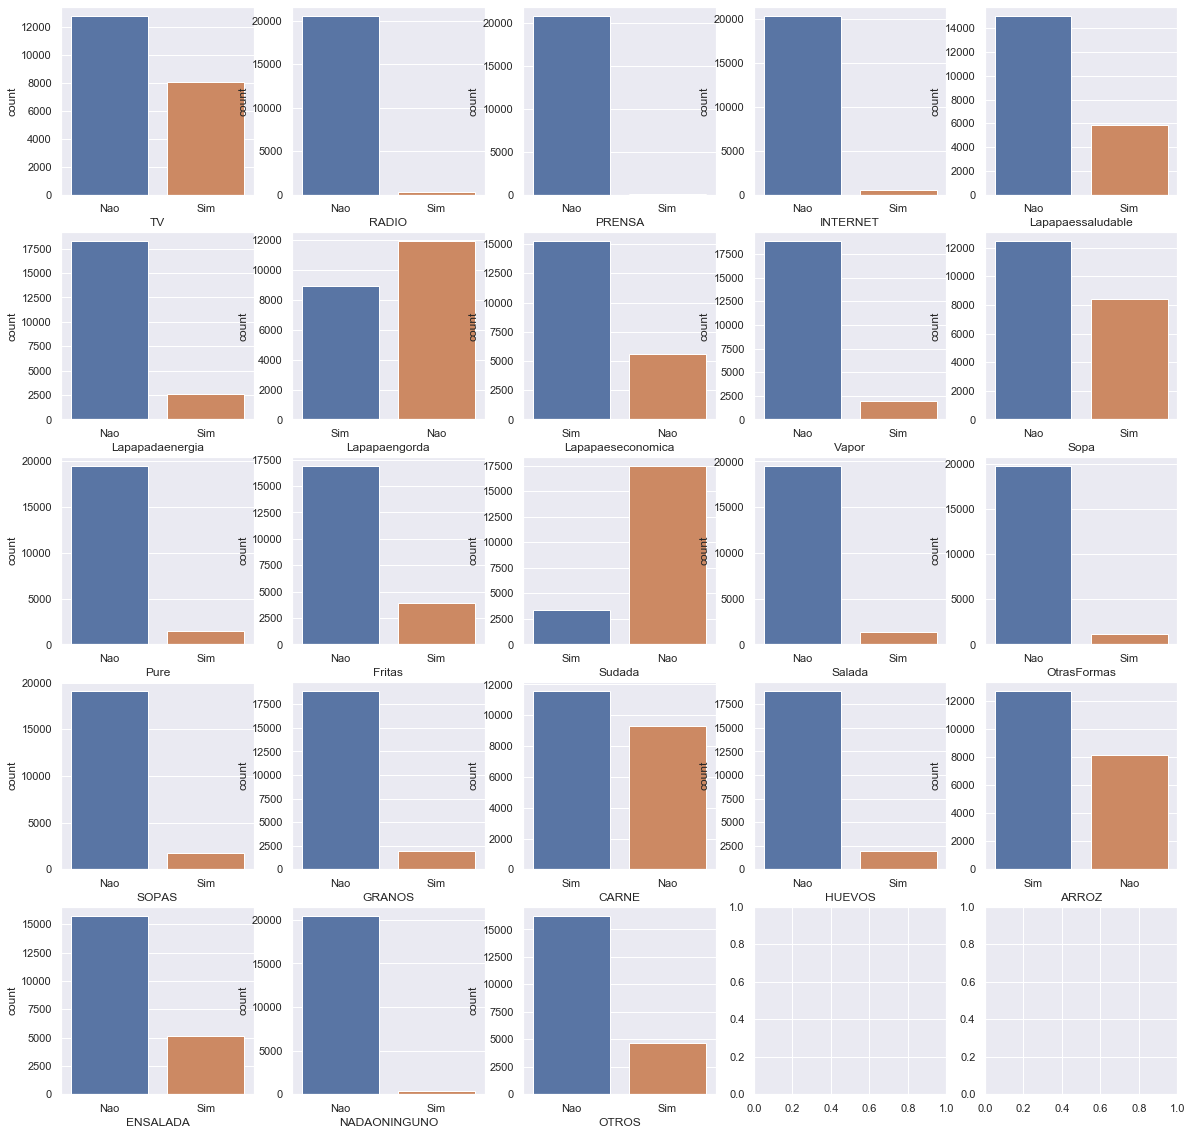

In [13]:
# Para transformar as variáveis categóricas, vamos verificar se realmente só existe sim e não no DataSet
sns.set(rc={'figure.figsize':(20,20)})

fig, ax = plt.subplots(nrows=5, ncols=5)
for i, col in enumerate(dataset.columns):
    c = i % 5
    r = i // 5
    sns.countplot(col, data=dataset, ax=ax[r, c])
plt.show()

In [14]:
# Confirmamos que só tem Sim e Não no Dataset. Então vamos substituir para binário:

#Sim = TRUE
#Nao = FALSE

dataset.replace({'Nao': False, 'Sim': True}, inplace=True)

#Mostra a alteração do Dataset já como One-Hot Encoding
dataset.head(10)


,TV,RADIO,PRENSA,INTERNET,Lapapaessaludable,Lapapadaenergia,Lapapaengorda,Lapapaeseconomica,Vapor,Sopa,...,Salada,OtrasFormas,SOPAS,GRANOS,CARNE,HUEVOS,ARROZ,ENSALADA,NADAONINGUNO,OTROS
0,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,True,False,True,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,True,True,False,False,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
4,False,False,False,False,False,False,True,True,False,False,...,True,False,False,False,True,False,True,False,False,False
5,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
6,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
7,False,False,False,False,False,False,True,True,False,False,...,False,True,False,False,False,False,True,False,False,True
8,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
9,False,False,False,False,False,False,True,True,False,False,...,False,True,False,False,False,False,True,False,False,False


In [23]:
# Verificação da quantidade de linhas e colunas, para ter uma base do que vamos colocar no parâmetro Min_support do Apriori

dataset.shape

(20869, 23)

In [21]:
# agora que o dataset está preparado, vamos usar APRIORI do pacote MLXTEND

dataset_apriori = apriori(dataset, min_support=0.03, use_colnames= True)

# Aí verificamos o agrupamento do min_support (Support):

dataset_apriori.sort_values(by='support', ascending=False)

,support,itemsets
4,0.731803,(Lapapaeseconomica)
16,0.609612,(ARROZ)
14,0.555225,(CARNE)
74,0.440174,"(ARROZ, Lapapaeseconomica)"
3,0.428578,(Lapapaengorda)
...,...,...
322,0.030188,"(ARROZ, Lapapaeseconomica, CARNE, OTROS)"
173,0.030188,"(ARROZ, Lapapaessaludable, Sudada)"
170,0.030140,"(Fritas, CARNE, Lapapaessaludable)"
254,0.030140,"(Fritas, ARROZ, Lapapaessaludable, TV)"


In [35]:
# Agora usamos o Association Rule do mesmo pacote MLXTEND com a métrica = confiança

regras_associacao = association_rules(dataset_apriori, metric='confidence', min_threshold=0.1)

In [36]:
# Agora usamos o conceito de antecendente, consequente

associacao = regras_associacao[['antecedents',
                               'consequents',
                               'support',
                               'confidence']].sort_values(by='confidence', ascending=False)
associacao.head(10)

,antecedents,consequents,support,confidence
1100,"(Lapapadaenergia, Lapapaeseconomica, Lapapaeng...",(TV),0.031770,1.000000
216,"(Lapapadaenergia, Lapapaengorda)",(TV),0.042216,1.000000
1157,"(ARROZ, Lapapadaenergia, CARNE)",(TV),0.050889,0.994382
2217,"(ARROZ, Lapapadaenergia, CARNE, Lapapaeseconom...",(TV),0.039101,0.992701
245,"(ENSALADA, Lapapadaenergia)",(TV),0.032440,0.992669
1134,"(ARROZ, Lapapadaenergia, Lapapaeseconomica)",(TV),0.054387,0.992133
239,"(ARROZ, Lapapadaenergia)",(TV),0.071014,0.991968
1146,"(Sopa, ARROZ, Lapapadaenergia)",(TV),0.031290,0.987897
233,"(Lapapadaenergia, CARNE)",(TV),0.068331,0.987535
849,"(ARROZ, Lapapadaenergia, Lapapaessaludable)",(TV),0.033111,0.985735


In [44]:
# Agora vamos ver quantas regras de associação tem confiança maior que 50%
associacao_maior50 = associacao[associacao.confidence > 0.5]

print('Total de Regras de Associação com confidência maior que 50% =>', associacao_maior50.shape[0], 'regras')

Total de Regras de Associação com confidência maior que 50% => 666 regras


In [51]:
#Vamos analisar a estatística das regras com confiança maior que 50%
associacao_maior50.describe()

,support,confidence
count,666.000000,666.000000
mean,0.070228,0.698148
std,0.057810,0.120172
min,0.030092,0.500494
25%,0.037568,0.611712
50%,0.049667,0.696328
75%,0.076477,0.744680
max,0.440174,1.000000


In [79]:
# Agrupamento das regras por consequents

associacao_maior50.groupby(['consequents'])['confidence'].count()

consequents
(TV)                                       61
(ARROZ)                                   138
(Lapapaessaludable, Lapapaeseconomica)     12
(CARNE)                                   115
(Lapapaessaludable, CARNE)                  3
(CARNE, Lapapaeseconomica)                 14
(CARNE, Lapapaeseconomica, TV)              2
(ARROZ, Lapapaeseconomica, TV)              3
(ARROZ, Lapapaessaludable)                  6
(ARROZ, Lapapaeseconomica)                 28
(ARROZ, CARNE)                             17
(CARNE, TV)                                20
(Lapapaeseconomica, TV)                    26
(ARROZ, CARNE, TV)                          2
(Lapapaessaludable)                        42
(Sopa)                                      9
(Lapapaeseconomica)                       142
(ARROZ, TV)                                23
(Lapapaengorda)                             2
(Sopa, Lapapaeseconomica)                   1
Name: confidence, dtype: int64

### Agora precisamos verificar quais regras tem como consequente que a batata (papa) engorda.

In [50]:

conseq_batata_engorda = associacao_maior50[associacao_maior50.consequents.apply(lambda X: 'Lapapaengorda' in X)]

print('Regras de Associação com consequente que a batata engorda =>', conseq_batata_engorda.shape[0])

Regras de Associação com consequente que a batata engorda => 2


In [52]:
# Visualização do consequente de que batata engorda

conseq_batata_engorda

,antecedents,consequents,support,confidence
2445,"(Sopa, ARROZ, ENSALADA, CARNE)",(Lapapaengorda),0.038766,0.506892
1696,"(Sopa, ENSALADA, CARNE)",(Lapapaengorda),0.041209,0.502924


# CONCLUSÃO

## Verificamos que temos duas regras com consequente de que batata engorda, além de mais 600 regras de associação com confiança maior que 50%

## Percebemos que os itens que são associadas tem maioria alimentos, mas um volume grande de regras relacionadas ao fato de ser econômica. Cremos que por ser barata, o consumo é maior e tem maior relação com as regras com confiança maior que 50%.